In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置字体大小
plt.rcParams['font.size'] = 20
# 加粗图片边框
plt.rcParams['axes.linewidth'] = 2

In [36]:
data_path = r'..\Question\Wimbledon_featured_matches.csv'
data = pd.read_csv(data_path)
print(data.head())

              match_id         player1        player2 elapsed_time  set_no  \
0  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:00       1   
1  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:38       1   
2  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:01       1   
3  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:31       1   
4  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:02:21       1   

   game_no  point_no  p1_sets  p2_sets  p1_games  ...  p2_break_pt_won  \
0        1         1        0        0         0  ...                0   
1        1         2        0        0         0  ...                0   
2        1         3        0        0         0  ...                0   
3        1         4        0        0         0  ...                0   
4        1         5        0        0         0  ...                0   

  p1_break_pt_missed p2_break_pt_missed  p1_distance_run  p2_distance_run  \
0        

In [53]:

def analyse_all_match(all_match):
    # 统计所有球员的姓名
    player1 = all_match['player1']
    player2 = all_match['player2']
    player = pd.concat([player1, player2], axis=0)
    # 取唯一值
    player = player.unique()
    # 字典序
    player.sort()
    player2index = {name: i for i, name in enumerate(player)}
    print(player2index)
    # 构建胜负矩阵
    win_matrix_serve_start = np.zeros((len(player), len(player)))
    win_matrix_return_start = np.zeros((len(player), len(player)))
    win_matrix_serve_after_win = np.zeros((len(player), len(player)))
    win_matrix_return_after_win = np.zeros((len(player), len(player)))
    win_matrix_serve_after_lose = np.zeros((len(player), len(player)))
    win_matrix_return_after_lose = np.zeros((len(player), len(player)))
    # 遍历每场比赛
    i = 0
    groupby_match = all_match.groupby('match_id')
    for match_id, match in groupby_match:
        # 一场比赛的数据
        player1 = match['player1'].values[0]
        player2 = match['player2'].values[0]
        groupby_set = match.groupby('set_no')
        for set_no, one_set in groupby_set:
            groupby_game = one_set.groupby('game_no')
            for point_no, one_point in groupby_game:
                pre_winner = 0
                for index, point in one_point.iterrows():
                    i += 1
                    point_victor = point['point_victor']
                    serve_flag = point['server']
                    
                    if pre_winner == 0:
                        pre_winner = point_victor
                        if serve_flag == 1:
                            if point_victor == 1:
                                win_matrix_serve_start[player2index[player1], player2index[player2]] += 1
                            else:
                                win_matrix_return_start[player2index[player2], player2index[player1]] += 1
                        else:
                            if point_victor == 1:
                                win_matrix_return_start[player2index[player1], player2index[player2]] += 1
                            else:
                                win_matrix_serve_start[player2index[player2], player2index[player1]] += 1
                        continue
                    if pre_winner == 1:
                        if serve_flag == 1:
                            if point_victor == 1:
                                win_matrix_serve_after_win[player2index[player1], player2index[player2]] += 1
                            else:
                                win_matrix_return_after_lose[player2index[player2], player2index[player1]] += 1
                        else:
                            if point_victor == 1:
                                win_matrix_return_after_win[player2index[player1], player2index[player2]] += 1
                            else:
                                win_matrix_serve_after_lose[player2index[player2], player2index[player1]] += 1
                    else:
                        if serve_flag == 1:
                            if point_victor == 1:
                                win_matrix_serve_after_lose[player2index[player1], player2index[player2]] += 1
                            else:
                                win_matrix_return_after_win[player2index[player2], player2index[player1]] += 1
                        else:
                            if point_victor == 1:
                                win_matrix_return_after_lose[player2index[player1], player2index[player2]] += 1
                            else:
                                win_matrix_serve_after_win[player2index[player2], player2index[player1]] += 1
    return win_matrix_serve_start, win_matrix_return_start, win_matrix_serve_after_win, win_matrix_return_after_win, win_matrix_serve_after_lose, win_matrix_return_after_lose, player
win_matrix_serve_start, win_matrix_return_start, win_matrix_serve_after_win, win_matrix_return_after_win, win_matrix_serve_after_lose, win_matrix_return_after_lose, player = analyse_all_match(data)

{'Alejandro Davidovich Fokina': 0, 'Alexander Bublik': 1, 'Alexander Zverev': 2, 'Andrey Rublev': 3, 'Carlos Alcaraz': 4, 'Christopher Eubanks': 5, "Christopher O'Connell": 6, 'Daniel Elahi Galan': 7, 'Daniil Medvedev': 8, 'David Goffin': 9, 'Denis Shapovalov': 10, 'Frances Tiafoe': 11, 'Grigor Dimitrov': 12, 'Guido Pella': 13, 'Holger Rune': 14, 'Hubert Hurkacz': 15, 'Jannik Sinner': 16, 'Jiri Lehecka': 17, 'Laslo Djere': 18, 'Liam Broady': 19, 'Lorenzo Musetti': 20, 'Marton Fucsovics': 21, 'Matteo Berrettini': 22, 'Maximilian Marterer': 23, 'Mikael Ymer': 24, 'Nicolas Jarry': 25, 'Novak Djokovic': 26, 'Quentin Halys': 27, 'Roman Safiullin': 28, 'Stan Wawrinka': 29, 'Stefanos Tsitsipas': 30, 'Tommy Paul': 31}


In [54]:
print(np.sum(win_matrix_serve_start))
print(np.sum(win_matrix_return_start))
print(np.sum(win_matrix_serve_after_win))
print(np.sum(win_matrix_return_after_win))
print(np.sum(win_matrix_serve_after_lose))
print(np.sum(win_matrix_return_after_lose))

773.0
415.0
2412.0
879.0
1718.0
1087.0


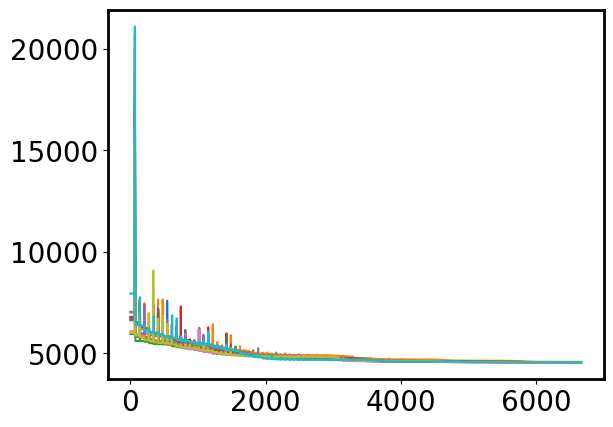

In [39]:
from scipy.optimize import minimize

def log_likelihood(params, win_matrix_serve_start, win_matrix_return_start, win_matrix_serve_after_win, win_matrix_return_after_win, win_matrix_serve_after_lose, win_matrix_return_after_lose,n):
    gamma = params[:n]
    r = params[n:-1]
    theta = params[-1]
    global history
    likelihood = 0
    for i in range(len(gamma)):
        for j in range(len(gamma)):
            a = win_matrix_serve_start[i, j]
            b = win_matrix_return_start[i, j]
            c = win_matrix_serve_after_win[i, j]
            d = win_matrix_return_after_win[i, j]
            e = win_matrix_serve_after_lose[i, j]
            f = win_matrix_return_after_lose[i, j]
            # likelihood += a * (np.log(theta * gamma[i] / (theta * gamma[i] + gamma[j]))) + b * (np.log(gamma[j] / (theta * gamma[i] + gamma[j])))
            likelihood += a * (np.log(theta * gamma[i] / (theta * gamma[i] + gamma[j]))) + \
                b * (np.log(gamma[i] / (gamma[i] + theta * gamma[j]))) + \
                c * (np.log(r[i] * theta * gamma[i] / (r[i] * theta * gamma[i] + 1 / r[j] * gamma[j]))) + \
                d * (np.log(r[i] * gamma[i] / (r[i] * gamma[i] + + 1 / r[j] * theta * gamma[j]))) + \
                e * (np.log(1 / r[i] * theta * gamma[i] / (1 / r[i] * theta * gamma[i] + r[j] * gamma[j]))) + \
                f * (np.log(1 / r[i] * gamma[i] / (1 / r[i] * gamma[i] + r[j] * theta * gamma[j])))
    history.append(-likelihood)
    return -likelihood

def Bradley_Terry(win_matrix_serve_start, win_matrix_return_start, win_matrix_serve_after_win, win_matrix_return_after_win, win_matrix_serve_after_lose, win_matrix_return_after_lose):
    # 初始化参数, (0, 1) 之间
    n = len(player)
    gamma_theta = np.random.RandomState(seed).uniform(1, 1000, 2 * n + 1)
    gamma_theta[n:-1] = np.random.RandomState(seed).uniform(0.5, 2, n)
    gamma_theta[-1] = np.random.RandomState(seed).uniform(0.5, 2, 1)
    
    # gamma_theta[:-1] = -np.log(gamma_theta[:-1])
    # 优化, gamma_theta 位于 (0, 1) 之间
    constraints = ({'type': 'ineq', 'fun': lambda x: x - 0.8})
    result = minimize(log_likelihood, gamma_theta, args=(win_matrix_serve_start, win_matrix_return_start, win_matrix_serve_after_win, win_matrix_return_after_win, win_matrix_serve_after_lose, win_matrix_return_after_lose, n), constraints=constraints)
    gamma = result.x[:n]
    r = result.x[n:-1]
    theta = result.x[-1]
    cross_entropy = result.fun
    return gamma, theta, r, cross_entropy

gamma_list = []
theta_list = []
r_list = []
history_list = []
for seed in range(10):
    history = []
    gamma_serve, theta_serve, r, cross_entropy = Bradley_Terry(win_matrix_serve_start, win_matrix_return_start, win_matrix_serve_after_win, win_matrix_return_after_win, win_matrix_serve_after_lose, win_matrix_return_after_lose)
    plt.plot(history, label=f'seed={seed}')
    gamma_serve = gamma_serve / np.sum(gamma_serve)
    gamma_list.append(gamma_serve)
    theta_list.append(theta_serve)
    r_list.append(r)
    history_list.append(history)
    

In [45]:
# save
import os
save_root = r'C:\Users\cheng\Desktop\20240201\sourece\with_markov_point'
os.makedirs(save_root, exist_ok=True)
np.save(save_root + r'\gamma_list.npy', gamma_list)
np.save(save_root + r'\theta_list.npy', theta_list)
np.save(save_root + r'\history_list.npy', np.array(history_list, dtype=object))

In [46]:
gamma_list = np.load(save_root + r'\gamma_list.npy')
theta_list = np.load(save_root + r'\theta_list.npy')
history_list = np.load(save_root + r'\history_list.npy', allow_pickle=True)

In [47]:
def abbreviate_name(full_name):
    """
    Converts a full name into abbreviated format suitable for academic papers.
    Args:
    - full_name (str): The full name to be abbreviated.
    
    Returns:
    - str: The abbreviated name.
    """
    parts = full_name.strip().split()
    if len(parts) == 1:  # Only last name provided
        return full_name
    else:
        # Abbreviate first and middle names, keep the last name as is
        abbreviated_parts = [f"{part[0]}." for part in parts[:-1]]
        abbreviated_name = " ".join(abbreviated_parts) + " " + parts[-1]
        return abbreviated_name

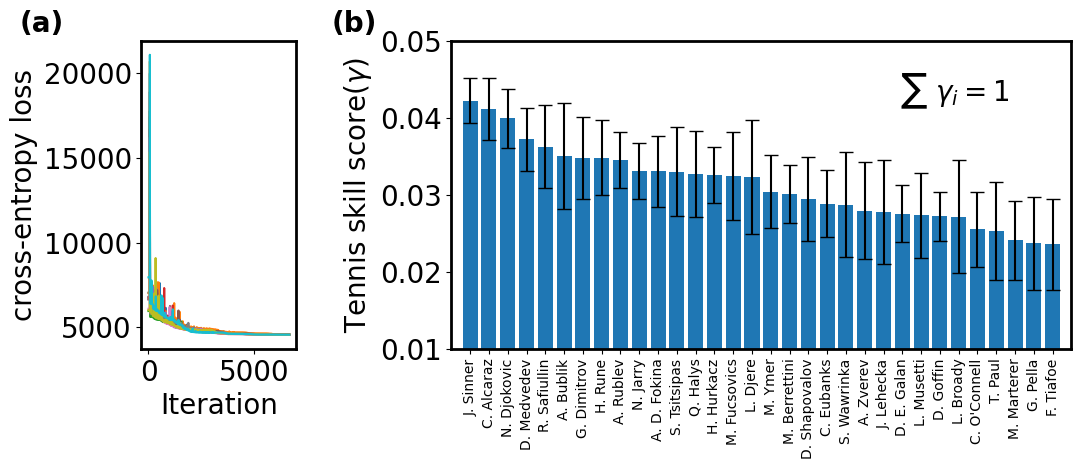

In [48]:
fondsize = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 4), width_ratios=(1, 4))
# 两个子图间加间距
plt.subplots_adjust(wspace=0.4)
# 人名缩写
abbreviation = [abbreviate_name(name) for name in player]
gamma_list = np.array(gamma_list)
# mean, std
gamma_mean = np.mean(gamma_list, axis=0)
gamma_std = np.std(gamma_list, axis=0)

descend_index = np.argsort(-gamma_mean)
gamma_mean = gamma_mean[descend_index]
gamma_std = gamma_std[descend_index]
axes[0].text(-0.5, 1.1, '(a)', transform=axes[0].transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

abbreviation = [abbreviation[i] for i in descend_index]
for history_one_seed in history_list:
    axes[0].plot(history_one_seed)
axes[0].set_xlabel('Iteration', fontsize=fondsize)
axes[0].set_ylabel('cross-entropy loss', fontsize=fondsize)

# ,增加柱子之间的间距
axes[1].bar(np.arange(len(abbreviation)), gamma_mean, yerr=gamma_std, capsize=5)
axes[1].set_xticks(np.arange(len(player)))
# 调整字体大小
axes[1].set_xticklabels(abbreviation, rotation=90, fontsize=10)
axes[1].set_ylim(0.01, 0.05)
axes[1].set_xlim(-1, len(abbreviation))
# axes[1].set_xlabel('player')
axes[1].set_ylabel('Tennis skill score($\gamma$)', fontsize=fondsize)
axes[1].text(-0.12, 1.1, '(b)', transform=axes[1].transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')
# axes[1].legend()
# 右上角加text \sum gaamma = 1
axes[1].text(0.9, 0.9, r'$\sum\ \gamma_i = 1$', transform=axes[1].transAxes, fontsize=fondsize, va='top', ha='right')
# xlabel 上加不同颜色的阴影


plt.show()

In [49]:
for history_one_seed in history_list:
    print(history_one_seed[-1])

4555.387329798311
4582.469638713969
4559.661357126083
4551.659938411997
4558.920053038667
4567.57657358667
4552.895615159265
4559.43118182257
4557.637547471159
4556.413509527716
